### Google Play Store Analysis

### Nested notebooks
The line below allows us to run the cleaning notebook inside of this one. With this line, the data itself does not need to be modified to remain consistent.

In [35]:
# Grab data from Cleaned Data notebook
%run ./Cleaning_Data.ipynb

# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Questions?
These are the questions we decided to answer in our Analysis.

## Questions to answer:
#### Does size affect download rates?
#### Does price affect download rates?
#### Which category is most/least popular?
#### Which category has best/worst average ratings?

### Does size affect download rates?
For our first objective, we wanted to determine if size affected the download rates. 

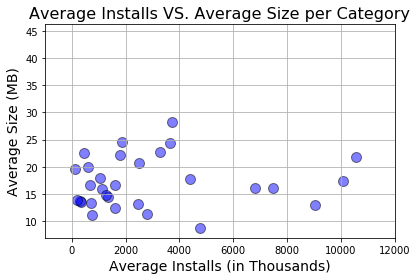

In [47]:
# Plot average installs vs size as a scatter
plt.scatter(df_InstallsSizeCat['Average Installs'], df_InstallsSizeCat['Average Install Size'],s=100 ,c=['blue'],edgecolors='black', marker='o', alpha=0.5)
plt.grid()
plt.title("Average Installs VS. Average Size per Category",fontsize=16)
plt.xlabel("Average Installs (in Thousands)",fontsize=14)
plt.ylabel("Average Size (MB)",fontsize=14)
plt.xlim(-1000, 12000)
# Set tight layout for png
plt.tight_layout()
# Save fig as png
plt.savefig("Average_installs_vs_size_Cat_Scatter.png")

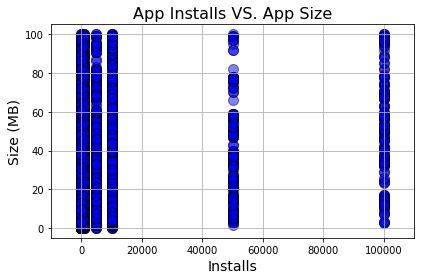

In [46]:
# Plot app installs vs size as a scatter
plt.scatter(df_AppInstalls['Installs (in Thousands)'], df_AppInstalls['Size'],s=100 ,c=['blue'],edgecolors='black', marker='o', alpha=0.5)
plt.grid()
plt.title("App Installs VS. App Size",fontsize=16)
plt.xlabel("Installs",fontsize=14)
plt.ylabel("Size (MB)",fontsize=14)
plt.xlim(-10000, 110000)
# Set tight layout for png
plt.tight_layout()
# Save fig as png
plt.savefig("App_installs_vs_size_App_Scatter.png")

### Which category has the best/worst average ratings?
For question four, we decided we wanted to know what the users of Android devices had declared as the best and worst category based on their average rating scores.

### Prepping data frame to plot average ratings

In [38]:
# Group Ratings df by category and rating
avg_Ratings=df_Ratings.groupby('Category')['Rating'].mean()
avg_Ratings=avg_Ratings.sort_values()

### Plotting the average ratings

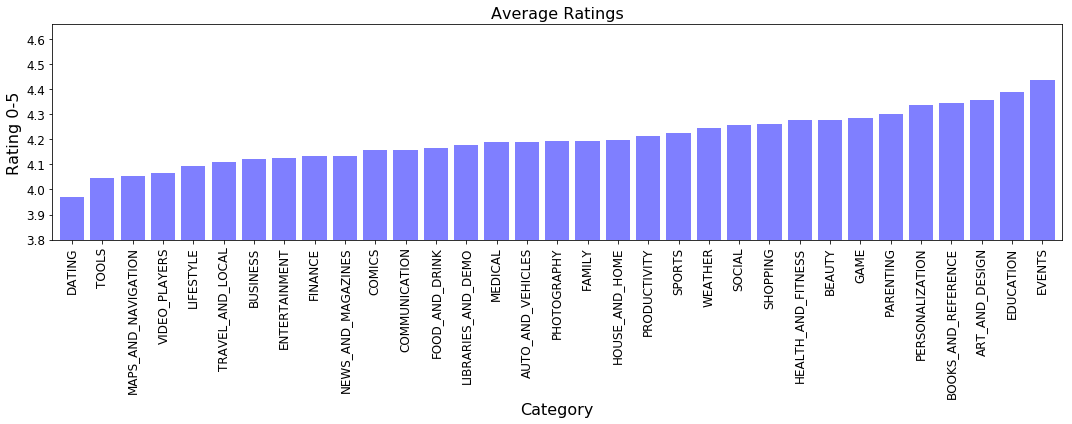

In [44]:
# Plot average ratings as a bar
avgRtPlt = avg_Ratings.plot(kind='bar', 
                            title ='Average Ratings',
                            figsize=(15,6), 
                            fontsize=12,
                            ylim=((3.8)),
                            width=0.8,
                            color='b',
                            alpha=0.5
                           )
avgRtPlt.set_xlabel('Category',fontsize=16)
avgRtPlt.set_ylabel('Rating 0-5',fontsize=16)
avgRtPlt.set_title('Average Ratings',fontsize=16)
# Set tight layout for png
plt.tight_layout()
# Save fig as png
plt.savefig('Average_Ratings_Bar.png')
plt.show()

### Prepping data frame to plot rating counts
We decided our second visualization here would be based on the counts of the ratings per category. This plot points out a flaw in the prior plot: the highest and lowest ranked categories have drastically smaller rating counts.

In [40]:
# Count ratings per category
ct_Ratings=df_Ratings.groupby('Category')['Rating'].count() 
ct_Ratings=ct_Ratings.sort_values()
ct_Ratings

Category
BEAUTY                   42
EVENTS                   45
PARENTING                50
COMICS                   58
ART_AND_DESIGN           62
LIBRARIES_AND_DEMO       65
AUTO_AND_VEHICLES        73
WEATHER                  75
HOUSE_AND_HOME           76
FOOD_AND_DRINK          109
MAPS_AND_NAVIGATION     124
ENTERTAINMENT           149
EDUCATION               155
VIDEO_PLAYERS           160
BOOKS_AND_REFERENCE     178
DATING                  195
TRAVEL_AND_LOCAL        226
NEWS_AND_MAGAZINES      233
SHOPPING                238
SOCIAL                  259
HEALTH_AND_FITNESS      297
BUSINESS                303
LIFESTYLE               314
PERSONALIZATION         314
PHOTOGRAPHY             317
SPORTS                  319
FINANCE                 323
COMMUNICATION           328
MEDICAL                 350
PRODUCTIVITY            351
TOOLS                   734
GAME                   1097
FAMILY                 1747
Name: Rating, dtype: int64

### Plotting the rating counts

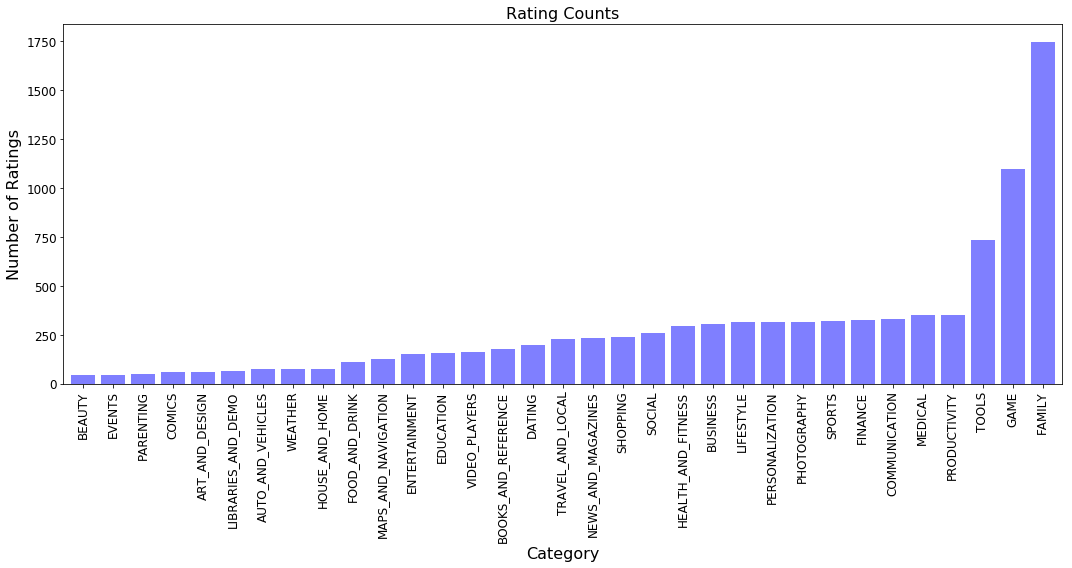

In [43]:
# Plot average ratings as a bar
ctRtPlt = ct_Ratings.plot(kind='bar', 
                          figsize=(15,8), 
                          fontsize=12,
                          width=0.8,
                          color='b',
                          alpha=0.5
                         )
ctRtPlt.set_xlabel('Category',fontsize=16)
ctRtPlt.set_ylabel('Number of Ratings',fontsize=16)
ctRtPlt.set_title('Rating Counts',fontsize=16)
# Set tight layout for png
plt.tight_layout()
# Save fig as png
plt.savefig('Rating_Counts_Bar.png')
plt.show()

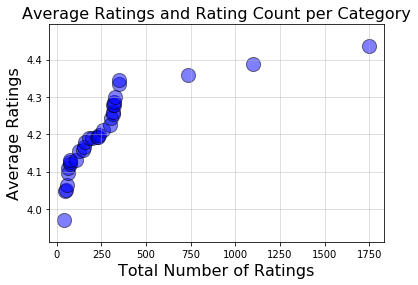

In [42]:
# Create scatter plot to compare average ratings vs number of ratings
ratings_Scatter=plt.scatter(ct_Ratings,avg_Ratings, marker='o', color='b', edgecolor='black',s=200,alpha=0.5)
# Incorporate the other graph properties
plt.title('Average Ratings and Rating Count per Category', fontsize=16)
plt.xlabel('Total Number of Ratings', fontsize=16)
plt.ylabel('Average Ratings', fontsize=16)
plt.grid(b=None, which='major', axis='both',alpha=0.5)
# Save fig as png
plt.savefig('Rating_Scatter.png')
plt.show()